# **Corpus: Travel Review Articles**

### **a)	Research Question(s):**
1.	What are the recurring themes or topics discussed in travel reviews for different locations?
2.	Do travel reviews written by professional writers sound different from those written by regular travelers?

### **b)	 Objectives:**
1.	To identify common topics discussed in travel reviews for different locations.
2.	To compare the positivity of reviews between famous and less-known destinations.
3.	To identify frequently occurring keywords, themes and how these differ in professional reviews and regular traveler reviews.
4.	To illustrate sentiments through impactful data visualization methods.

### **c)	Methodology:**

**i.	KWIC (Key Word in Context) Analysis**-
It helps identify common themes, sentiment patterns, and language differences in travel reviews by displaying key terms alongside their surrounding text to understand how travelers express their experiences.

**ii.	Frequent Word Analysis-**
Identifies the most commonly used words in travel reviews to reveal key themes, popular topics, and sentiment patterns across different locations and types of reviewers.

**iii.	Sentiment Analysis**-
Applies NLP techniques (e.g., VADER) to evaluate the emotional tone of travel reviews to determine whether the expressed opinions about destinations are positive, negative, or neutral.

### **Justification:**

The selected methodologies are justified based on their effectiveness in analyzing textual data and their relevance to the research objectives:

1.	**KWIC (Key Word in Context) Analysis** is appropriate for identifying recurring themes and language patterns as it provides insight into how specific terms are used in different contexts, helping to explore travelers' perceptions and common topics discussed in reviews.

2.	**Frequent Word Analysis** is essential for detecting dominant topics and themes across a large volume of travel reviews, allowing the identification of key aspects that travelers frequently highlight, such as accommodations, attractions, or services.

3.	**Sentiment Analysis** using NLP techniques like VADER (Valence Aware Dictionary and sEntiment Reasoner) is suitable for understanding the emotional tone of reviews, making it possible to compare the positivity or negativity of opinions across different locations and between professional and regular traveler reviews.


In [ ]:
import os                   # Used to access file directories
import pdfplumber           # Used to extract text from PDF files
import nltk                 # Main Library for Natural Language Processing
import string               # Helps to remove punctuation
import matplotlib.pyplot as plt  # For drawing graphs
import seaborn as sns       # For making statistical charts
from wordcloud import WordCloud  # To create word cloud images
from nltk.sentiment import SentimentIntensityAnalyzer # Sentiment Analysis
from nltk.tokenize import word_tokenize   # Splits text into individual words
from nltk.corpus import stopwords         # Common stop words like 'is', 'the', 'and'
from nltk.stem import WordNetLemmatizer   # Converts words into their root form (e.g., running → run)
from collections import Counter           # Counts the frequency of words


# Download NLTK resources
nltk.download('vader_lexicon')  # Pre-trained sentiment model
nltk.download('punkt')         # Tokenizer to split text into words
nltk.download('stopwords')     # List of common English stop words
nltk.download('wordnet')       # Dictionary for Lemmatization

# Upload Files
from google.colab import files  # For uploading files in Google Colab
uploaded = files.upload()       # Shows a button to upload files

# Function to Extract Text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""   # Empty string to store text
    with pdfplumber.open(pdf_path) as pdf:  # Open the PDF file
        for page in pdf.pages:             # Loop through each page
            text += page.extract_text() if page.extract_text() else ""
    return text.strip()  # Remove unwanted spaces

# Function to Read Text Files
def read_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        return file.read()

# Collect all text from uploaded files
corpus = []

# Loop through uploaded files
for filename in uploaded.keys():
    if filename.endswith(".pdf"):
        corpus.append(extract_text_from_pdf(filename))  # Extract Text from PDF
    elif filename.endswith(".txt"):
        corpus.append(read_text_file(filename))        # Read Text Files

# Combine all text into one large text
corpus_text = " ".join(corpus)

# Text Preprocessing
# Define Stop Words and Lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to Preprocess Text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove Punctuation
    tokens = word_tokenize(text)  # Split text into words
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]

# Preprocess the Text
processed_words = preprocess_text(corpus_text)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Saving TraR1.txt to TraR1 (9).txt
Saving TraR2.txt to TraR2 (9).txt
Saving TraR3.txt to TraR3 (9).txt
Saving TraR4.txt to TraR4 (9).txt
Saving TraR5.txt to TraR5 (9).txt
Saving TraR6.txt to TraR6 (9).txt
Saving TraR7.txt to TraR7 (9).txt
Saving TraR8.txt to TraR8 (9).txt
Saving TraR9.txt to TraR9 (9).txt
Saving TraR10.txt to TraR10 (9).txt
Saving TraR11.txt to TraR11 (9).txt
Saving TraR12.txt to TraR12 (9).txt
Saving TraR13.txt to TraR13 (9).txt
Saving TraR14.txt to TraR14 (9).txt
Saving TraR15.txt to TraR15 (9).txt


<ipython-input-21-d75c801aff45>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette="viridis")


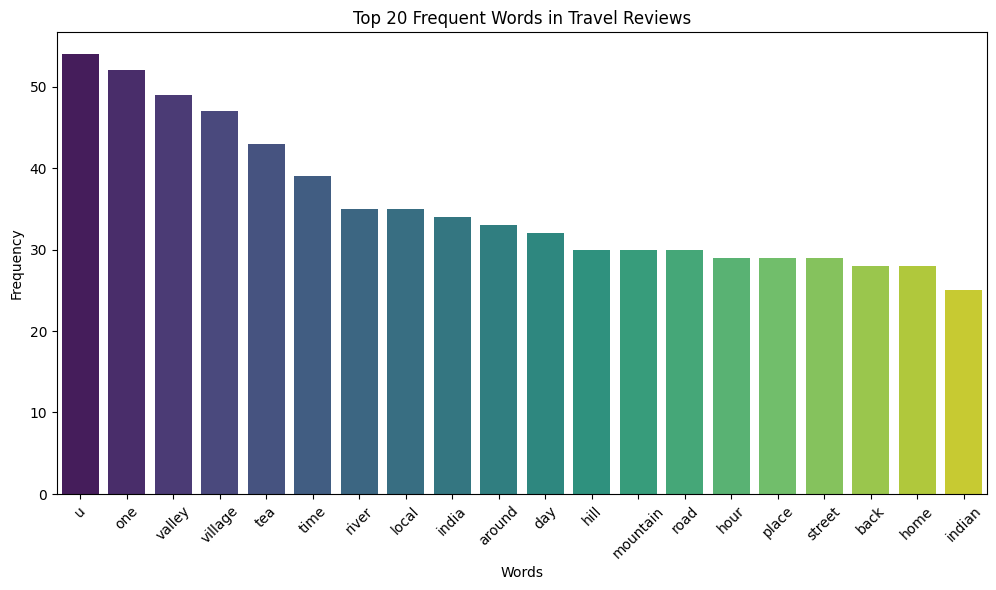

In [ ]:
# Count Word Frequency
word_freq = Counter(processed_words)
common_words = word_freq.most_common(20)  # Top 20 Frequent Words

# Plot Frequent Words Bar Graph
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette="viridis")
plt.title("Top 20 Frequent Words in Travel Reviews") # Visualizing top 20 frequent words
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45) # Rotate Words for Better View
plt.show()


In [ ]:
# KWIC Analysis
# This function shows the keyword with 3 words before and 3 words after
def kwic(keyword, window=3):
    print(f"\nKWIC Results for '{keyword}':")
    tokens = word_tokenize(corpus_text.lower())
    for i, word in enumerate(tokens):
        if word == keyword:
            left = " ".join(tokens[max(0, i-window):i])
            right = " ".join(tokens[i+1:i+window+1])
            print(f"...{left} **{word}** {right}...")

kwic("beautiful")  # KWIC for the word "beautiful"
kwic("india")     # KWIC for the word "india"
kwic("nature")    # KWIC for the word "nature"


KWIC Results for 'beautiful':
...and saw the **beautiful** 7:00 am sun...
...we saw a **beautiful** sangam for the...
...with a strange **beautiful** , thick multicoloured...
.... it was **beautiful** , lively and...
...opportunity to take **beautiful** photographs . we...
.... there were **beautiful** antique stores ,...
..., resulting in **beautiful** patchwork quilt fields...
...either macabre or **beautiful** depending on your...
...about ! another **beautiful** tomb is i...
...college . the **beautiful** st. george ’...
...considered the most **beautiful** in the surrounding...
...and the most **beautiful** . hanker is...
...to an exquisitely **beautiful** house . “...

KWIC Results for 'india':
..., one of **india** ’ s most...
...mughals of 16th-century **india** . unlike his...
...of the east **india** company got around...
...become one of **india** ’ s most...
...the partition of **india** and pakistan ,...
...srinagar one of **india** ’ s most...
...had elsewhere in **india

In [ ]:
#Sentiment Analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(corpus_text)  # Calculate sentiment scores

#This detects if the review is Positive, Negative, or Neutral
positive = sentiment_scores['pos']
neutral = sentiment_scores['neu']
negative = sentiment_scores['neg']

#Sentiment Results
print("\nSentiment Analysis Results:")
print(f"Positive: {positive*100:.2f}%")
print(f"Neutral: {neutral*100:.2f}%")
print(f"Negative: {negative*100:.2f}%")



Sentiment Analysis Results:
Positive: 10.50%
Neutral: 85.00%
Negative: 4.50%


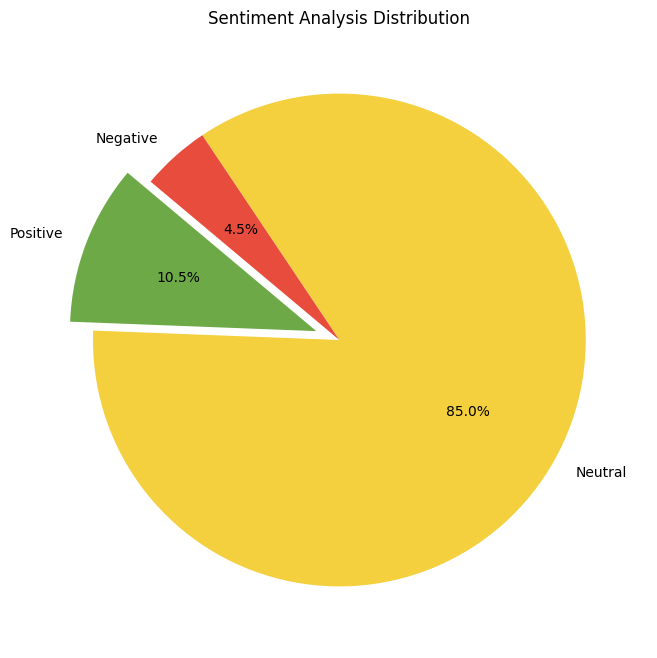

In [ ]:
# Plot Sentiment Pie Chart
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive, neutral, negative]
colors = ['#6daa47', '#f4d03f', '#e74c3c']
explode = (0.1, 0, 0)  # explode positive slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
plt.title("Sentiment Analysis Distribution")
plt.show()


<ipython-input-27-68cf29953695>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette=colors)  # Create bar plot (Sentiment vs Proportion)


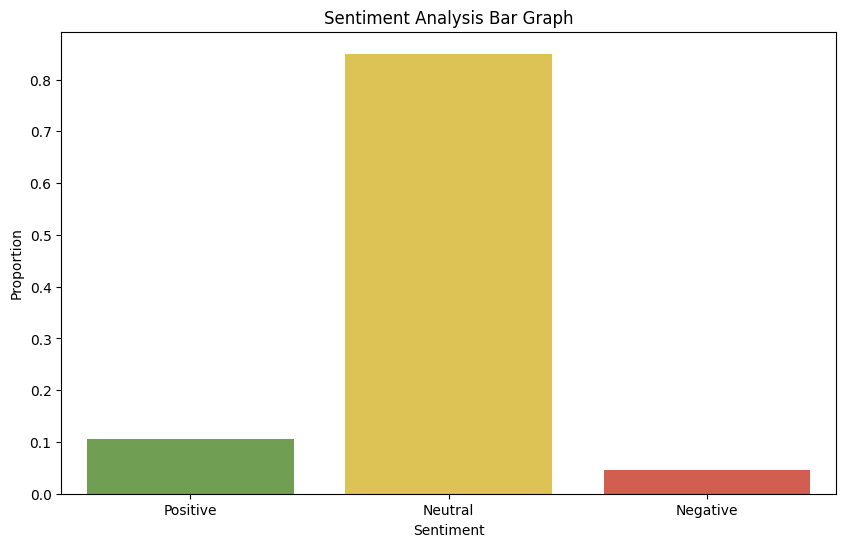

In [ ]:
# Set figure size
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=sizes, palette=colors)  # Create bar plot (Sentiment vs Proportion)
plt.title("Sentiment Analysis Bar Graph")  # Set title
plt.xlabel("Sentiment")  # Label x-axis
plt.ylabel("Proportion")  # Label y-axis
plt.show()  # Show plot


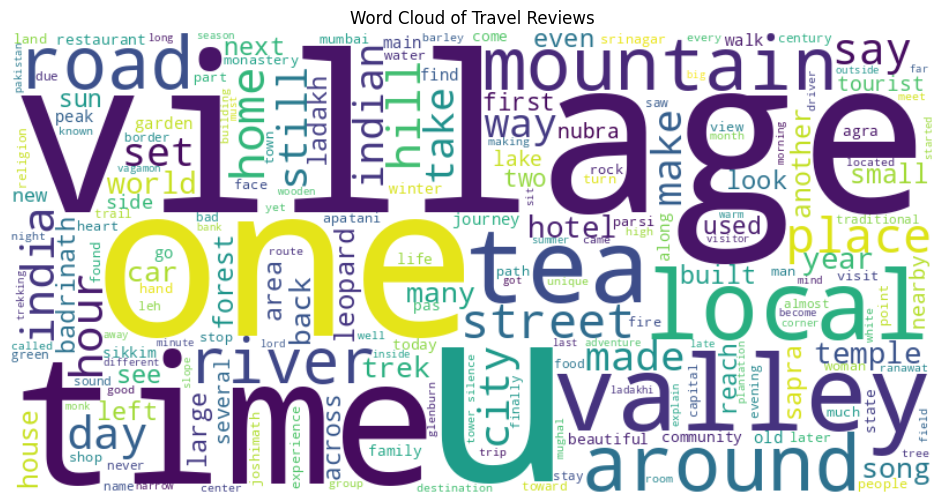

In [ ]:
# Word Cloud
#This will create a Word Cloud with the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(processed_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Travel Reviews")
plt.show()


# **Analysis**

As part of my research journey, I analyzed a collection of travel reviews to understand what travelers talk about, how they feel about different destinations, and how their writing styles differ. The analysis focused on frequent word patterns, sentiments, and language usage to uncover key insights into travel experiences.

### **1. Frequent Word Analysis: What Do Travelers Talk About?**
The first step in my analysis was identifying the most commonly used words in travel reviews. Words like “travel,” “village,” “valley,” “India,” “place,” “people,” and “tour” appeared frequently, showing that the reviews mainly focus on travel destinations and experiences.

### **Key insights from this analysis:**
•	The word “India” stands out, suggesting that many reviews focus on travel experiences in India.
•	Words like “food” and “nature” highlight the importance of local cuisine and natural beauty in travelers’ experiences.
•	General terms like “time” and “people” reflect how travelers describe their journey and interactions with locals.

### **2. KWIC (Key Word in Context) Analysis: How Do Travelers Express Their Experiences?**

By analyzing how certain words are used in sentences, I gained a deeper understanding of how travelers express their thoughts.

### **Some key findings:**
•	The word “beautiful” is often used to describe places, nature, and experiences, showing a positive outlook.
•	“India” frequently appears alongside terms like “culture” and “travel”, highlighting the country's rich heritage and appeal to travelers.
•	The word “nature” is commonly linked to expressions of love, beauty, and enjoyment, showing that natural scenery plays a big role in travel experiences.


### **3. Sentiment Analysis: How Do Travelers Feel?**
Understanding the emotional tone of the reviews was an important part of my research. The results showed that most reviews were neutral, with fewer expressing strong emotions.

**Sentiment Results:**

•	***Neutral*** : 85% — Most reviews focus on objective descriptions without strong positive or negative emotions.

•	***Positive*** : 10.5% — A smaller portion of the reviews express happiness and satisfaction with their experiences.

•	***Negative*** : 4.5% — Very few reviews share disappointment or negative feedback.

**What does this mean?**

The high percentage of neutral reviews suggests that many travelers write factual and informative reviews rather than sharing emotions. The limited negative sentiment could indicate that travel experiences are generally positive, or that travelers may avoid writing negative feedback.


### **4. Word Cloud: A Visual Journey**

To bring the analysis to life, I created a Word Cloud — a visual representation where the most frequently used words appear larger.
The Word Cloud highlighted key themes like “travel,” “India,” “place,” and “people,” reinforcing the findings from the frequent word analysis. This visual tool makes it easy to see which topics dominate traveler conversations at a glance.


**What Did I Discover?**


1. Most travel reviews focus on places, attractions, and experiences.
2. India is a popular destination, with travelers frequently mentioning its culture and beauty.
3. Travelers tend to describe their experiences in a neutral or informative tone rather than sharing strong emotions.
4. When emotions are expressed, they are mostly positive — with nature, beauty, and food being the highlights of their journeys.


## **Final Thoughts**
Travel reviews offer a window into how people experience the world. Through this analysis, I've gained valuable insights into the voices of travelers — what they notice, what they value, and how they express their experiences. This research not only helps understand traveler preferences but also provides useful information for businesses and the tourism industry to improve services and create memorable experiences.
